# **Binary Classification using Neural Networks**
#  Diabetes Classification
Predict the given person is suffering from diabetes.
<hr>
-- M.SAKSHAM <br>
-- 29-12-2022 <br>
-- V : 01
<hr>

The construction of deep learning models in Keras as follows:
1. Define your model. Create a sequence and add layers.
2. Compile your model. Specify loss functions and optimizers.
3. Fit your model. Execute the model using data.
4. Make predictions. Use the model to generate predictions on new data.

## Import dependencies...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

## Read the data...

In [2]:
train=pd.read_csv('dataset/train.csv')
test=pd.read_csv('dataset/test.csv')
subm=pd.read_csv('dataset/sample_submission.csv')

## Stats on Data...

In [3]:
train.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [4]:
train.diabetes.value_counts()

0    400
1    214
Name: diabetes, dtype: int64

33.3257328990228

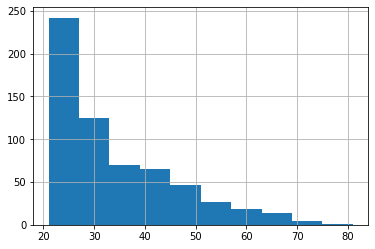

In [5]:
train.age.hist()
display(train.age.mean())
plt.show()

In [6]:
train.skew()

p_id                    -0.001023
no_times_pregnant        0.906273
glucose_concentration    0.120295
blood_pressure          -1.877868
skin_fold_thickness      0.014201
serum_insulin            2.394700
bmi                     -0.539151
diabetes pedigree        1.978319
age                      1.143901
diabetes                 0.637293
dtype: float64

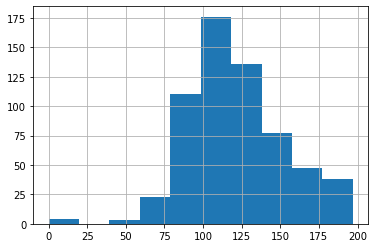

In [7]:
train.glucose_concentration.hist()
plt.show()

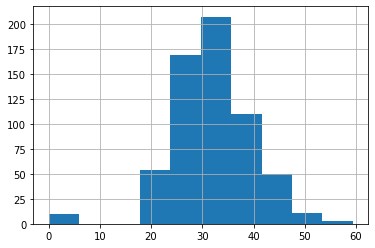

In [8]:
train.bmi.hist()
plt.show()

## Hyper parameters...

Parameters which are external to the model. Weights and bias are the parameters which are internal to the model generation.

* No of Hidden Units.
* Learning rate.
* Activation function.
* No of epochs

In [9]:
hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100

## Model creation...

In [10]:
# We use the sequential model of keras...

model = Sequential()

## Layers Addition...

In [11]:
model.add(Dense(hidden_units, input_dim=8, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

## Compilation...

In [12]:
sgd=optimizers.SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])

C:\Users\M.SAKSHAM\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Fitting the model...

In [13]:
train_x=train.iloc[:,1:9]
train_x.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,2,112,68,22,94,34.1,0.315,26
1,11,143,94,33,146,36.6,0.254,51
2,2,93,64,32,160,38.0,0.674,23
3,1,120,80,48,200,38.9,1.162,41
4,3,128,72,25,190,32.4,0.549,27


In [14]:
train_y=train.iloc[:,9]
train_y.head()

0    0
1    1
2    1
3    0
4    1
Name: diabetes, dtype: int64

In [15]:
model.fit(train_x, train_y, epochs=no_epochs, batch_size=len(train),  verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6861 - acc: 0.5717 - 519ms/epoch - 519ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6526 - acc: 0.6352 - 4ms/epoch - 4ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6390 - acc: 0.6433 - 4ms/epoch - 4ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6328 - acc: 0.6433 - 3ms/epoch - 3ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6284 - acc: 0.6450 - 4ms/epoch - 4ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6248 - acc: 0.6482 - 5ms/epoch - 5ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6218 - acc: 0.6531 - 4ms/epoch - 4ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6192 - acc: 0.6531 - 3ms/epoch - 3ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6170 - acc: 0.6564 - 3ms/epoch - 3ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6152 - acc: 0.6564 - 4ms/epoch - 4ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6135 - acc: 0.6564 - 4ms/epoch - 4ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6119 - acc: 0.6580 - 3ms/epoch - 3ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6104 - acc: 0.6564 - 4ms/epoch - 4ms/step
Epoch 14/100
1/1 - 0s - loss: 0.6089 - acc:

## Predicting the model...

In [16]:
test_x=test.iloc[:,1:]
predictions = model.predict(test_x)

5/5 [==============================] - 0s 2ms/step


In [17]:
predictions

array([[0.3020136 ],
       [0.2488539 ],
       [0.13717216],
       [0.37256324],
       [0.19447061],
       [0.5541274 ],
       [0.49918082],
       [0.35408503],
       [0.47074926],
       [0.22555886],
       [0.55544585],
       [0.3167094 ],
       [0.65260375],
       [0.31893754],
       [0.3815457 ],
       [0.17213534],
       [0.38331097],
       [0.12896448],
       [0.5268837 ],
       [0.5114115 ],
       [0.34991497],
       [0.3603441 ],
       [0.3634929 ],
       [0.54072577],
       [0.448934  ],
       [0.23457874],
       [0.15177256],
       [0.36236015],
       [0.39480346],
       [0.25223792],
       [0.29311642],
       [0.22068378],
       [0.3151285 ],
       [0.13599958],
       [0.3587472 ],
       [0.2675907 ],
       [0.3986617 ],
       [0.5244506 ],
       [0.12108245],
       [0.27069426],
       [0.20056097],
       [0.5732776 ],
       [0.35253608],
       [0.51579785],
       [0.27251115],
       [0.34513092],
       [0.5100764 ],
       [0.702

In [18]:
# For kaggle submission ...

rounded = [int(round(x[0])) for x in predictions]
print(rounded)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


## Submission...

In [19]:
subm.diabetes=rounded
subm.to_csv('submission.csv',index=False)